In [205]:
import pandas as pd
import matplotlib.pyplot as plt
FILE_PATH = "GermanCredit.csv"
df =  pd.read_csv(FILE_PATH)


Preprocessing

Problem 1

In [206]:

#1
DROPVALUE = 3
df['None Count'] = (df == 'none').sum(axis=1)
cols = list(df.columns)
df = df[[cols[-1]] + cols[0:(len(cols) -1)]]
df.sort_values(['None Count'],ascending= False)
drop_list  = df.sort_values(['None Count'],ascending= False).index.to_list()[0:DROPVALUE]
df.drop(index =drop_list)
df.drop('None Count', axis = 1, inplace = True)
df


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


Problem 2

In [207]:
for col in df.columns:
    new_list = [str(s).replace("'", '') for s in df[col].to_list() if type(s) == str]
    if not(new_list):
        new_list = df[col].to_list() 
    df.drop(col, axis = 1, inplace = True)
    df[col] = new_list
df
    

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


Problem 3

In [208]:
df.replace(to_replace=["no checking", '<0','0<=X<200','>=200'],value=['No Checking', 'Low', 'Medium','High'],inplace=True)
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,Low,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,Low,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


Problem 4


In [209]:
df.replace(to_replace=['no known savings', '<100', '100<=X<500', '500<=X<1000',
'>=1000'],value=['No Savings', 'Low', 'Medium', 'High','High' ],inplace=True)
df


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


Problem 5

In [210]:
df.replace(to_replace=['good', 'bad', 'unemployed', '<1',
'1<=X<4','4<=X<7','>=7'],value=['1', '0', 'Unemployed', 'Amateur','Professional','Experienced','Expert' ],inplace=True)
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,0


Analysis

Problem 1.a)

In [211]:
df.groupby('class').count()['foreign_worker'].to_frame("Count of foreign workers")

,Count of foreign workers
class,
0,300
1,700


Problem 1.b)

In [212]:
df.groupby('savings_status').count()['employment'].to_frame("Count of employment types")

,Count of employment types
savings_status,
High,111
Low,603
Medium,103
No Savings,183


Problem 2)

In [213]:
df.loc[(df.employment == 'Experienced') & (df.personal_status == 'male single')]['credit_amount'].mean()

4142.592592592592

Problem 3)

In [214]:
df.groupby('job').mean()['duration'].to_frame("Average credit duration")

/var/folders/b1/nvd1svxs7118kl2pzvjs4b_40000gn/T/ipykernel_70445/947173170.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('job').mean()['duration'].to_frame("Average credit duration")


,Average credit duration
job,
high qualif/self emp/mgmt,25.168919
skilled,21.411111
unemp/unskilled non res,17.363636
unskilled resident,16.535000


Problem 4)

In [215]:
print("Most common checking status: %s" %df['checking_status'].value_counts().idxmax())
print("Most common checking status: %s" %df['savings_status'].value_counts().idxmax())

Most common checking status: No Checking
Most common checking status: Low


Visulization

Problem 1)

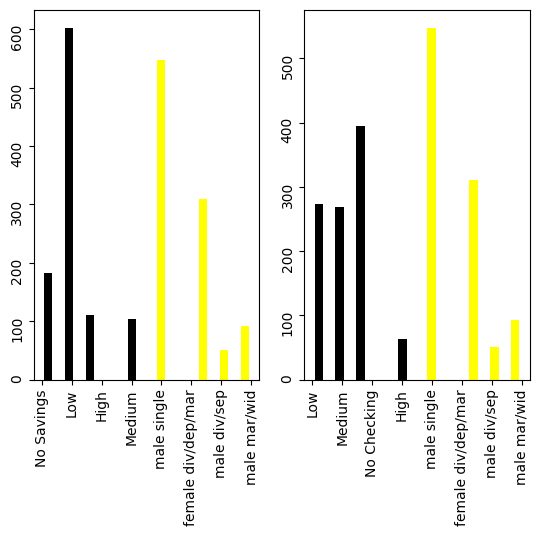

In [216]:
fig, axes = plt.subplots(1, 2)
colors = ['black', 'yellow']
plt.xticks(rotation = 45)
axes[0].hist([df['savings_status'],df['personal_status']],color = colors)
axes[0].tick_params(labelrotation=90)
plt.xticks(rotation = 45)
axes[1].hist([df['checking_status'],df['personal_status']],color = colors)
axes[1].tick_params(labelrotation=90)

plt.show()


Problem 2)

/var/folders/b1/nvd1svxs7118kl2pzvjs4b_40000gn/T/ipykernel_70445/3437879080.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df.loc[df.credit_amount > 4000].groupby('property_magnitude').mean()['age']


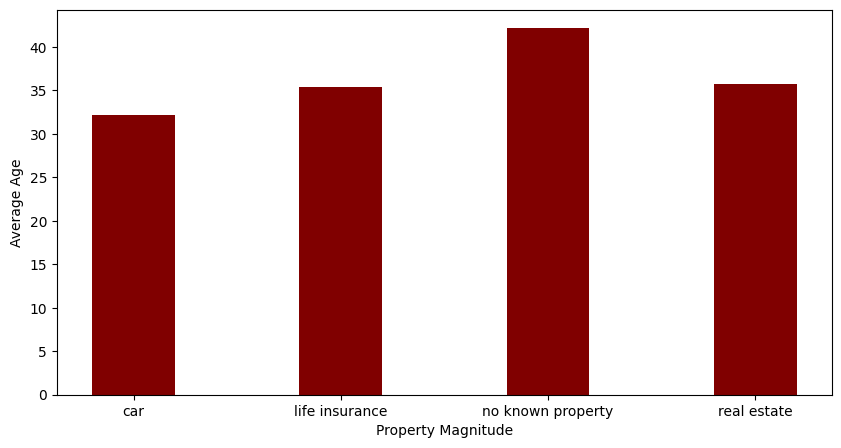

In [217]:
data = df.loc[df.credit_amount > 4000].groupby('property_magnitude').mean()['age']
prop = data.keys()
values = data.to_list()
fig = plt.figure(figsize = (10, 5))
 
plt.bar(prop, values, color ='maroon', width = 0.4)
 
plt.xlabel("Property Magnitude")
plt.ylabel("Average Age")
plt.show()

Problem 3)

Text(0.5, 1.0, 'Personal Status')

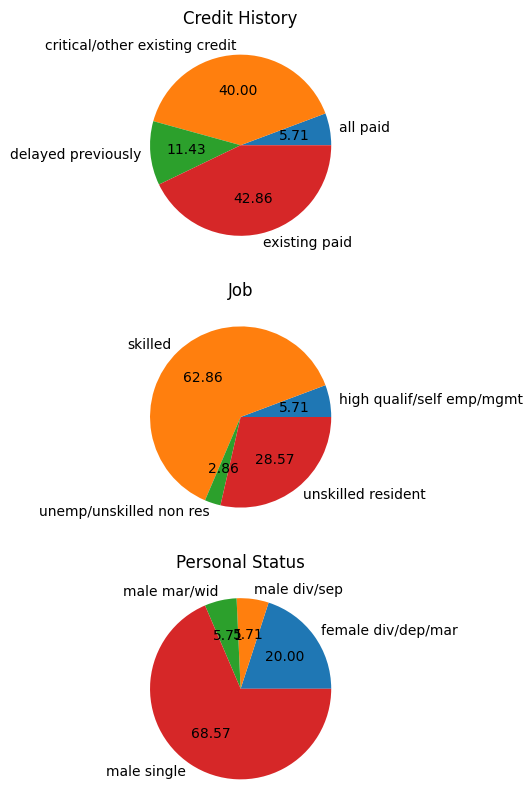

In [218]:
data = df.loc[(df.age > 40) & (df.savings_status == 'High')].groupby('credit_history')['credit_history'].describe()
data1 = df.loc[(df.age > 40) & (df.savings_status == 'High')].groupby('job')['job'].describe()
data2 = df.loc[(df.age > 40) & (df.savings_status == 'High')].groupby('personal_status')['personal_status'].describe()
fig, axes = plt.subplots(3, 1)
fig.set_size_inches(10, 10)
#axes[0].title = 'Credit Histroy'
axes[0].pie(data['count'].to_list(),labels = data['count'].index.to_list(),autopct='%1.2f')
axes[0].set_title('Credit History')
axes[1].pie(data1['count'].to_list(),labels = data1['count'].index.to_list(),autopct='%1.2f')
axes[1].set_title('Job')
axes[2].pie(data2['count'].to_list(),labels = data2['count'].index.to_list(),autopct='%1.2f')
axes[2].set_title('Personal Status')